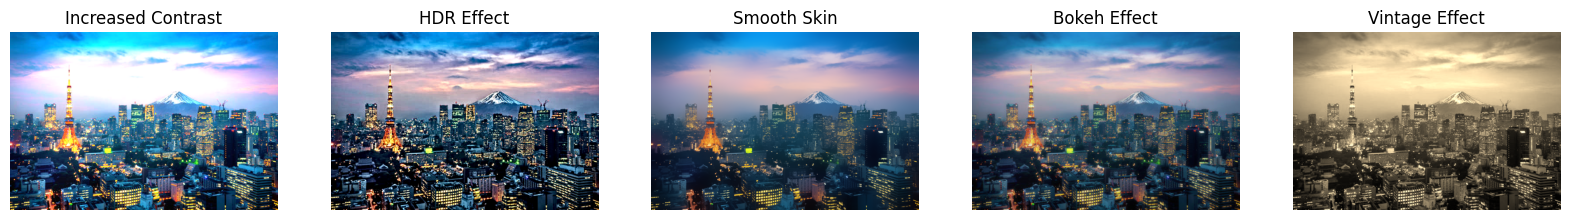

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def adjust_contrast(image, factor=1.5):
    # Tăng cường độ tương phản (mỗi pixel nhân với factor)
    return cv2.convertScaleAbs(image, alpha=factor, beta=0)

def apply_hdr_effect(image):
    # Áp dụng hiệu ứng HDR
    hdr = cv2.detailEnhance(image, sigma_s=12, sigma_r=0.15)
    return hdr

def smooth_skin(image):
    # Làm mịn da
    return cv2.bilateralFilter(image, 50, 75, 75)

def apply_bokeh_effect(image, blur_radius=21):
    # Làm mờ nền
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mask = cv2.GaussianBlur(gray, (blur_radius, blur_radius), 0)
    bokeh = cv2.addWeighted(image, 0.75, cv2.merge([mask, mask, mask]), 0.25, 0)
    return bokeh

def add_vintage_effect(image):
    # Thêm hiệu ứng vintage
    sepia_filter = np.array([[0.272, 0.534, 0.131],
                             [0.349, 0.686, 0.168],
                             [0.393, 0.769, 0.189]])
    vintage = cv2.transform(image, sepia_filter)
    vintage = np.clip(vintage, 0, 255)
    return vintage.astype(np.uint8)

# Đọc ảnh đầu vào
image = cv2.imread(r'D:\VS_code\image_processing_numpy\NewBackground.jpg')

# Áp dụng các hiệu ứng chỉnh sửa
contrast_image = adjust_contrast(image)
hdr_image = apply_hdr_effect(image)
smooth_image = smooth_skin(image)
bokeh_image = apply_bokeh_effect(image)
vintage_image = add_vintage_effect(image)

# Hiển thị ảnh kết quả
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
axs[0].imshow(cv2.cvtColor(contrast_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Increased Contrast')
axs[1].imshow(cv2.cvtColor(hdr_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('HDR Effect')
axs[2].imshow(cv2.cvtColor(smooth_image, cv2.COLOR_BGR2RGB))
axs[2].set_title('Smooth Skin')
axs[3].imshow(cv2.cvtColor(bokeh_image, cv2.COLOR_BGR2RGB))
axs[3].set_title('Bokeh Effect')
axs[4].imshow(cv2.cvtColor(vintage_image, cv2.COLOR_BGR2RGB))
axs[4].set_title('Vintage Effect')

for ax in axs:
    ax.axis('off')

plt.show()


array([<Axes: title={'center': 'Cartoon Effect'}>,
       <Axes: title={'center': 'Sketch Effect'}>,
       <Axes: title={'center': 'Oil Painting Effect'}>, <Axes: >,
       <Axes: >], dtype=object)

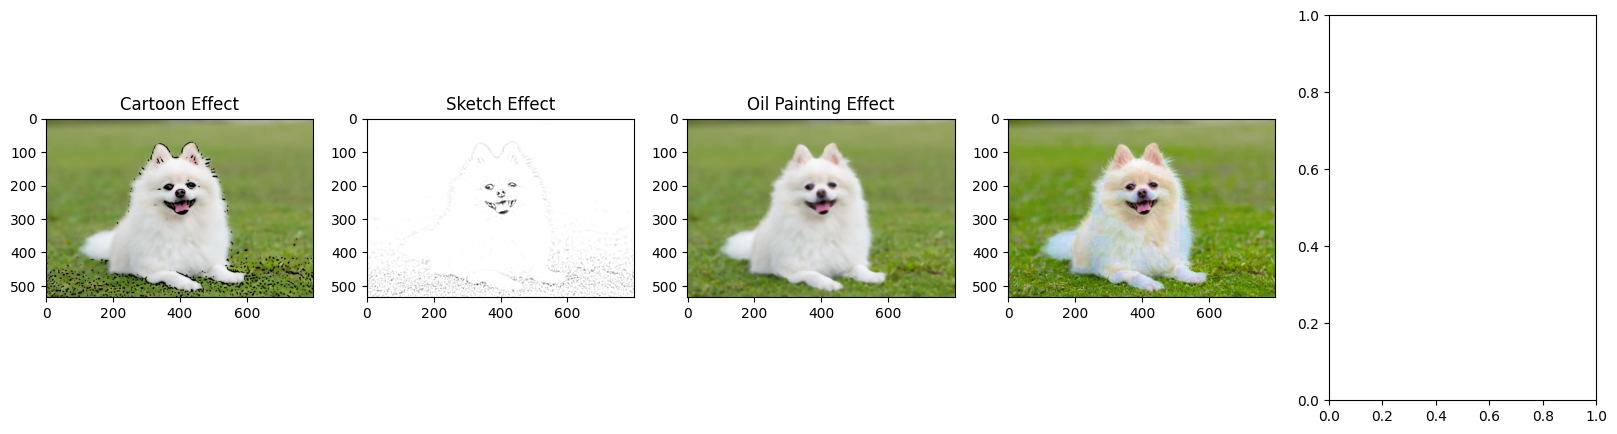

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def cartoon_effect(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)
    edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
    color = cv2.bilateralFilter(image, 9, 300, 300)
    cartoon = cv2.bitwise_and(color, color, mask=edges)
    return cartoon

def sketch_effect(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    inv_gray = cv2.bitwise_not(gray)
    blur = cv2.GaussianBlur(inv_gray, (21, 21), 0)
    inv_blur = cv2.bitwise_not(blur)
    sketch = cv2.divide(gray, inv_blur, scale=256.0)
    return sketch

def oil_painting_effect_alternative(image):
    dst = np.zeros_like(image)
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            roi = image[max(0, y - 4):min(y + 5, image.shape[0]), max(0, x - 4):min(x + 5, image.shape[1])]
            dst[y, x] = np.median(roi, axis=(0, 1))
    return dst

def polarizing_effect(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hsv_image[:, :, 1] = cv2.equalizeHist(hsv_image[:, :, 1])
    polarizing_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
    return polarizing_image


# Đọc ảnh đầu vào
image = cv2.imread(r'D:\VS_code\image_processing_numpy\dog.jpeg')

# Áp dụng các hiệu ứng chỉnh sửa
cartoon_image = cartoon_effect(image)
sketch_image = sketch_effect(image)
oil_paint_image = oil_painting_effect_alternative(image)
polarized_image = polarizing_effect(image)

# Hiển thị ảnh kết quả
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
axs[0].imshow(cv2.cvtColor(cartoon_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Cartoon Effect')
axs[1].imshow(sketch_image, cmap='gray')
axs[1].set_title('Sketch Effect')
axs[2].imshow(cv2.cvtColor(oil_paint_image, cv2.COLOR_BGR2RGB))
axs[2].set_title('Oil Painting Effect')
axs[3].imshow(cv2.cvtColor(polarized_image, cv2.COLOR_BGR2RGB))
axs


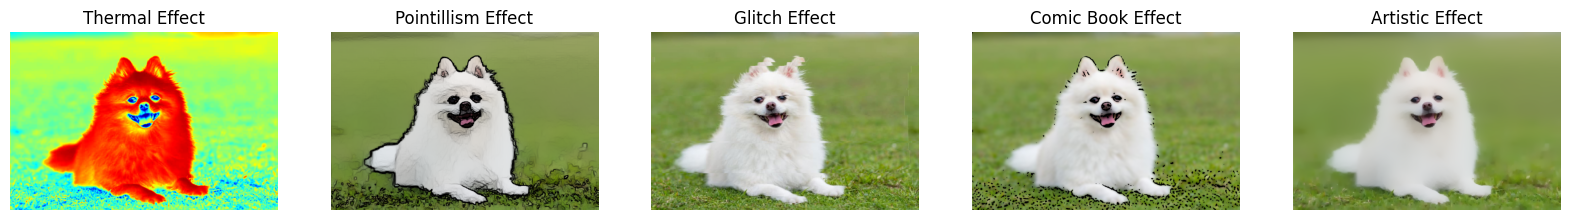

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def thermal_effect(image):
    thermal = cv2.applyColorMap(image, cv2.COLORMAP_JET)
    return thermal

def pointillism_effect(image):
    pointillism = cv2.stylization(image, sigma_s=60, sigma_r=0.3)
    return pointillism

def glitch_effect(image):
    rows, cols, _ = image.shape
    glitch = image.copy()
    num_lines = 10
    for _ in range(num_lines):
        y1 = np.random.randint(0, rows)
        y2 = np.random.randint(y1, rows)
        x_shift = np.random.randint(-20, 20)
        glitch[y1:y2, :] = np.roll(glitch[y1:y2, :], x_shift, axis=1)
    return glitch

def comic_book_effect(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(gray, 5)
    edges = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
    color = cv2.bilateralFilter(image, 9, 300, 300)
    comic = cv2.bitwise_and(color, color, mask=edges)
    return comic

def artistic_effect(image):
    artistic = cv2.edgePreservingFilter(image, flags=1, sigma_s=60, sigma_r=0.4)
    return artistic

# Đọc ảnh đầu vào
image = cv2.imread(r'D:\VS_code\image_processing_numpy\dog.jpeg')

# Áp dụng các hiệu ứng chỉnh sửa
thermal_image = thermal_effect(image)
pointillism_image = pointillism_effect(image)
glitch_image = glitch_effect(image)
comic_image = comic_book_effect(image)
artistic_image = artistic_effect(image)

# Hiển thị ảnh kết quả
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
axs[0].imshow(cv2.cvtColor(thermal_image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Thermal Effect')
axs[1].imshow(cv2.cvtColor(pointillism_image, cv2.COLOR_BGR2RGB))
axs[1].set_title('Pointillism Effect')
axs[2].imshow(cv2.cvtColor(glitch_image, cv2.COLOR_BGR2RGB))
axs[2].set_title('Glitch Effect')
axs[3].imshow(cv2.cvtColor(comic_image, cv2.COLOR_BGR2RGB))
axs[3].set_title('Comic Book Effect')
axs[4].imshow(cv2.cvtColor(artistic_image, cv2.COLOR_BGR2RGB))
axs[4].set_title('Artistic Effect')

for ax in axs:
    ax.axis('off')

plt.show()


In [4]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install opencv-python opencv-contrib-python


  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/a7/9e/7110d2c5d543ab03b9581dbb1f8e2429863e44e0c9b4960b766f230c1279/opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl (45.5 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\ADMIN\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
